# Ejercicio 2
## Consigna: Mediciones de eventos únicos
Utilizando un circuito conformado por un relé, un switch y un diodo removible se busca medir:
 - Tiempo de apertura y tiempo de cierre (con y sin diodo de protección)
 - Sobre-tensión en la llave en el momento de apertura (con y sin diodo de protección)

### Procedimiento Especifico de la Medición:
El circuito que armamos en la protoboard para medir es el siguiente:

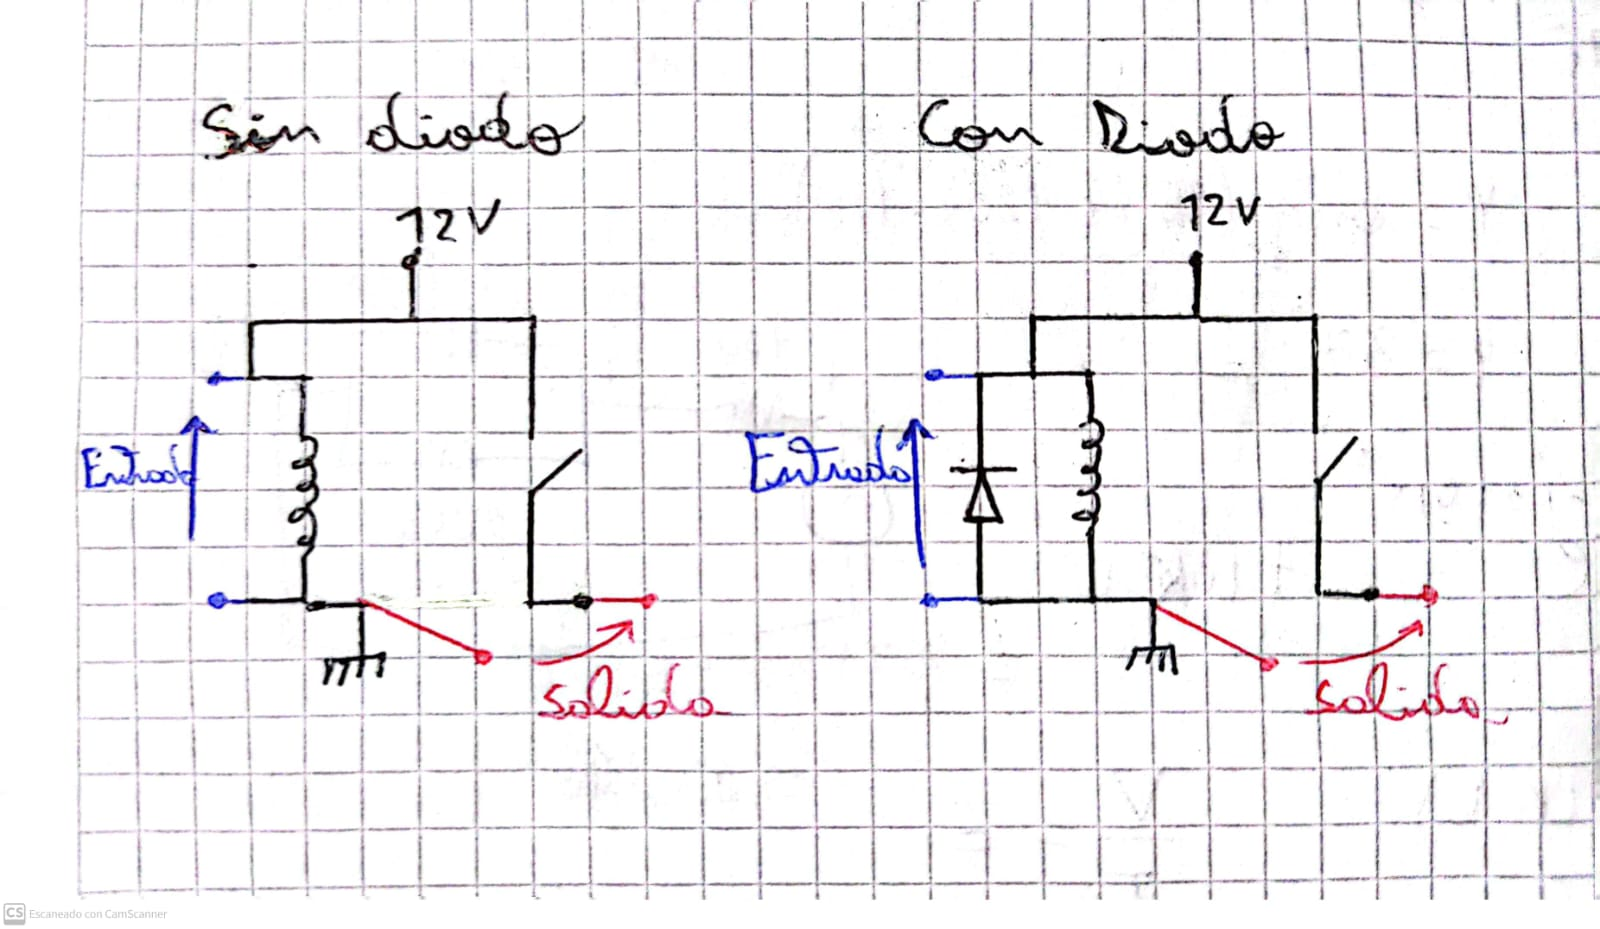

El interruptor del Relé lo utilizamos como un cable al que se lo conectaba y desconectaba a tierra.
Las puntas de medicion las colocamos para la entrada de forma paralela a la bobina del Rele y para la salida entre la bobina y el interruptor, de esta manera podemos ver el tiempo de cierre y apertura comparando la entrada y salida.

Luego colocamos un diodo en paralelo a la bobina del relé para ver como cambia la sobre-tension en la llave durante la apertura

### Instrumentos y Componentes usados:

- Fuente Usada HY3005D https://www.jameco.com/Jameco/Products/ProdDS/301938.pdf
- Osciloscopio: https://www.gwinstek.com/en-global/products/downloadSeriesDownNew/1864/142
- Rele 12V: https://www.electronicoscaldas.com/datasheet/SRD-Series_Songle-Relay.pdf
- Diodo zenner

### Resultados de las mediciones:
- Entrada: CH2 (Azul)
- Salida:  CH1 (Amarillo)

Sin Diodo:
- Subida: 

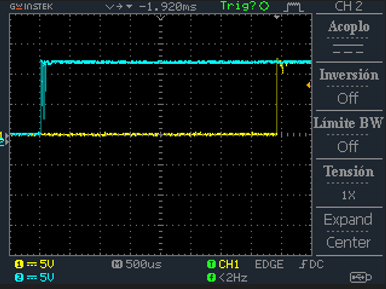
- Bajada: (Entrada con punta x10 para apreciar todo el rango de sobretension, salida en punta x1) 

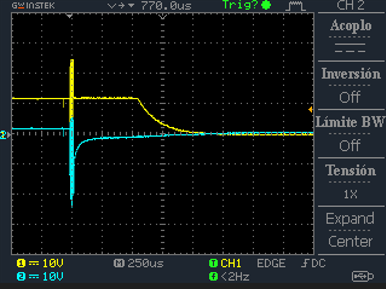

Con Diodo:
- Subida: 

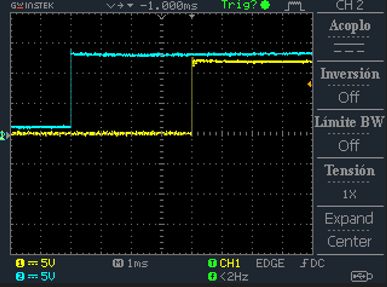
- Bajada: 

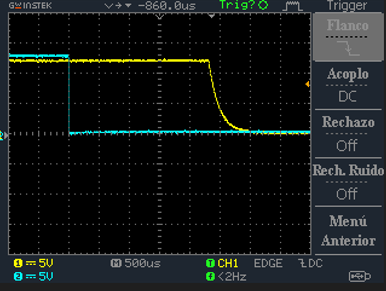

### Hoja de calculos

In [19]:
# Apertura s/d: Divisiones 7.8 div, con 500 us/div
tasd = 7.8*500e-6
# Bajada s/d: 10% de 12V son 1.2V por lo tanto la salida tarda 4 divisiones en estabilizarse, con 250us/div
tbsd = 4*250e-6
# Apertura c/d: Divisiones 4 div, con 1ms/div
tacd = 4*1e-3
# Bajada c/d: Divisiones 5.8 div con 500us/div
tbcd = 5.8*500e-6

#Sobretension Sin diodo (Valor pico)
#1.25 div con 10V/div
Vsd = 1.25*10
#Sobretension Con diodo (Valor pico) Despreciable

print(f'Tiempo de apertura sin diodo: {tasd}s\nTiempo de Bajada sin diodo: {tbsd}s\n')
print(f'Tiempo de apertura con diodo: {tacd}s\nTiempo de Bajada con diodo: {tbcd}s\n')
print(f'Sobretension sin diodo: {Vsd}V')

Tiempo de apertura sin diodo: 0.0039s
Tiempo de Bajada sin diodo: 0.001s

Tiempo de apertura con diodo: 0.004s
Tiempo de Bajada con diodo: 0.0029s

Sobretension sin diodo: 12.5V


Incertidumbre de la hoja de datos: 
- Canal vertical: ±(3% + 0.1 div + 1mV)
- Canal horizontal: ±(0.01%)
- Punta x1: ±0,2%

In [21]:
dtasd = (0.01/100)* tasd
dtbsd = (0.01/100)* tbsd
dtacd = (0.01/100)* tacd
dtbcd = (0.01/100)* tbcd
dvsd = (3/100)*Vsd + 0.1 * 10 + 1e-3

#incertidumbres de tiempo con k=2
Utasd = 2*dtasd/(mt.sqrt(3))
Utbsd = 2*dtbsd/(mt.sqrt(3))
Utacd = 2*dtacd/(mt.sqrt(3))
Utbcd = 2*dtbcd/(mt.sqrt(3))
#incertidubre relativa tension
urvsd = dvsd/(mt.sqrt(3)*Vsd)
#de la punta de prueba
urFp1 = 0.2/(100*mt.sqrt(3)) 
#Incertidumbre total tension con k=2
Uvsd = 2*mt.sqrt((urvsd)**2+(urFp1)**2)*Vsd

print(f'Incertidumbres:\n')
print(f'Tiempo de apertura sin diodo: {Utasd}s\nTiempo de Bajada sin diodo: {Utbsd}s\n')
print(f'Tiempo de apertura con diodo: {Utacd}s\nTiempo de Bajada con diodo: {Utbcd}s\n')
print(f'Sobretension sin diodo: {Uvsd}v')

Incertidumbres:

Tiempo de apertura sin diodo: 4.503332099679081e-07s
Tiempo de Bajada sin diodo: 1.1547005383792517e-07s

Tiempo de apertura con diodo: 4.6188021535170067e-07s
Tiempo de Bajada con diodo: 3.3486315612998296e-07s

Sobretension sin diodo: 1.5891301603917365v


# Resultados

Tiempo de apertura sin diodo = (3.9 ± 0.00045)ms | K = 2

Tiempo de bajada sin diodo = (1.0 ± 0.00011)ms | K = 2

Tiempo de apertura con diodo = (4.0 ± 0.00046)ms | K = 2

Tiempo de bajada sin diodo = (2.9 ± 0.00033)ms | K = 2

Sobretensión sin diodo = (12.5 ± 1.6)V | K = 2 (Medido como valor pico)

Sobretensión con diodo = No se puede apreciar a simple vista

Como podemos ver, tenemos alrededeor de un tiempo de apertura de 4ms con y sin diodo, pero en relacion al tiempo de cierre, este cambia respecto a si se coloca o no el diodo, cuando no está colocado el tiempo de cierre es de 1ms pero al conectarlo sube a casi 3ms. 

Y en relacion a la sobretension, con cada corte en la carga de la bobina del rele aparece una sobretension en sus bornes que causa perturbaciones en el funcionamiento de este. Nosotros colocaremos un diodo que sirve como modulo de proteccion contra sobretensiones para reducir el valor de la sobretensión de corte y por consiguiente, la energía de las señales a un nivel que no perturbe a esa bobina.
Antes de colocar el diodo podemos ver en el grafico un aumento de tension muy significativo en un breve periodo de tiempo, pero cuando se lo coloca en el circuito, este pico desaparece, y esa es la funcion que cumple nuestro diodo, a costa de aumentar 3 veces el tiempo de caida del rele.